<a href="https://colab.research.google.com/github/EdVKu/Econophysics_Projects/blob/main/Copia_de_Ej2_Wishart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribución de Eigenvalores para WOEs

Ley Marchenko-Pastur:

$$P(E) = \frac{\kappa\sqrt{(E_+ - E)(E-E_-)}}{2\pi E}$$

$$E_{\pm} = \left(\frac{1}{\sqrt{\kappa}} \pm 1\right)², \kappa = \frac{T}{N}$$



Con Es no normalizadas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(1300)

# Dimensiones a usar: 5x10, 20x10, 20x5
x = []
def mat(M,N):

    return np.random.normal(0,1,(M,N))


Ai = mat(10,20)
def w1(a,b,n):
    p = []
    for i in range(0,n):
      A = mat(a,b)
      p.append(np.matmul(A,np.transpose(A))/b)
    return p

def w1i(a,b,n):
    p = []
    for i in range(0,n):
      A = Ai
      p.append(np.matmul(A,np.transpose(A)))
    return p

def w2(a,b,n):
    p = []
    for i in range(0,n):
      A = mat(a,b)
      p.append(np.matmul(np.transpose(A), A)/a)
    return p

def w2i(a,b,n):
    p = []
    for i in range(0,n):
      A = Ai
      p.append(np.matmul(np.transpose(A), A))
    return p

def eig(m):
    return np.linalg.eigvals(m)
N=10
T=20


w1p = w1i(N,T,1)[0]
w2p = w2i(N,T,1)[0]
eig1 = eig(w1p)
eig2 = eig(w2p)
print(eig2)
print(eig1)

[ 5.76451137e+01+0.00000000e+00j  3.92150270e+01+0.00000000e+00j
  3.25498348e+01+0.00000000e+00j  2.36597092e+01+0.00000000e+00j
  2.03668949e+01+0.00000000e+00j  1.32712412e+01+0.00000000e+00j
  1.16177637e+01+0.00000000e+00j  8.46970518e+00+0.00000000e+00j
  5.11814719e+00+0.00000000e+00j  3.43896684e+00+0.00000000e+00j
 -5.89072671e-15+0.00000000e+00j  2.74258329e-15+0.00000000e+00j
  2.16949972e-15+9.83642978e-16j  2.16949972e-15-9.83642978e-16j
 -3.04473500e-15+0.00000000e+00j -1.05862542e-15+9.77410371e-16j
 -1.05862542e-15-9.77410371e-16j -1.22760346e-15+0.00000000e+00j
 -8.18607831e-16+0.00000000e+00j  6.35439613e-17+0.00000000e+00j]
[57.64511369 39.21502704 32.54983478 23.65970922 20.36689488  3.43896684
  5.11814719  8.46970518 13.27124124 11.61776373]


In [ ]:
N = 50
T = 100
j = 50

wish1 = w1(N,T,j)
def Pp(h):
  p=[]
  for i in range(0,j):
    for t in range(0,len(h[0])):
      if(eig(h[i])[t].real>=1e-8):
        p.append(eig(h[i])[t].real)
  return p


p = Pp(wish1)



<ipython-input-51-ae2036017031>:8: RuntimeWarning: invalid value encountered in sqrt
  fx=(kappa*np.sqrt((Ep-(xc))*((xc)-Em))/(np.pi*2*xc))


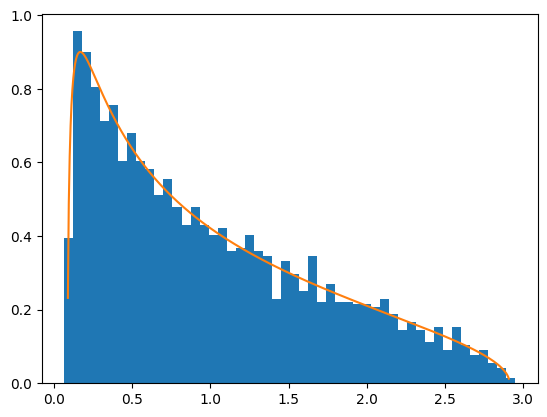

In [ ]:
R = np.min(p)

xc = np.linspace(np.min(p), np.max(p), num=500)
kappa=T/N
Em= (1/(np.sqrt(kappa))+1)**2
Ep= (1/(np.sqrt(kappa))-1)**2

fx=(kappa*np.sqrt((Ep-(xc))*((xc)-Em))/(np.pi*2*xc))
plt.hist(p,bins=50, density = True)
plt.plot(xc,fx)